<a href="https://colab.research.google.com/github/eskayML/free-ai-classes-2023/blob/main/Free_AI_Classes_Starter_NoteBook_by_eskayML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. IMPORT REQUIRED PACKAGES/ LIBRARIES

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# 2. LOAD DATA

In [81]:
train = pd.read_csv('Housing_dataset_train.csv')
test = pd.read_csv('Housing_dataset_test.csv')
sample_sub = pd.read_csv('Sample_submission.csv')

In [82]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [83]:
train.isna().sum(), test.isna().sum()

(ID                  0
 loc              1813
 title            1722
 bedroom          1799
 bathroom         1805
 parking_space    1811
 price               0
 dtype: int64,
 ID               0
 loc              0
 title            0
 bedroom          0
 bathroom         0
 parking_space    0
 dtype: int64)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


# 3. EDA

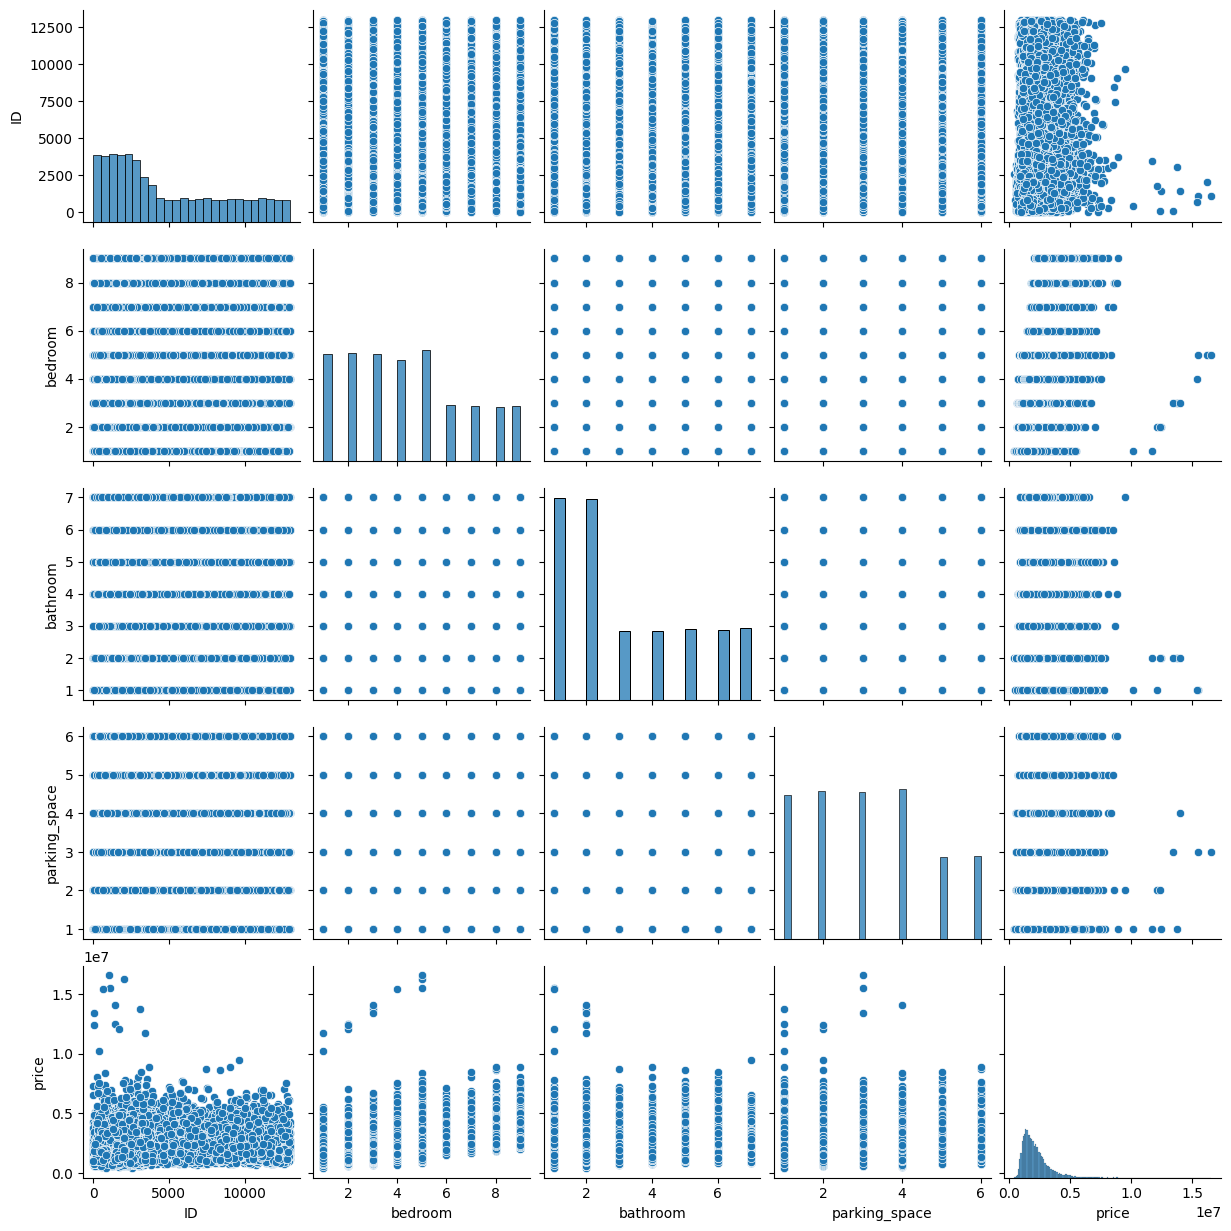

In [85]:
sns.pairplot(train)

<Axes: xlabel='parking_space', ylabel='count'>

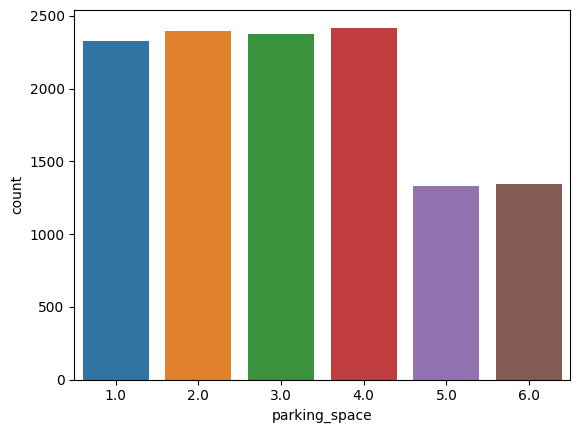

In [86]:
sns.countplot(data = train, x  = 'parking_space')

<Axes: xlabel='bedroom', ylabel='price'>

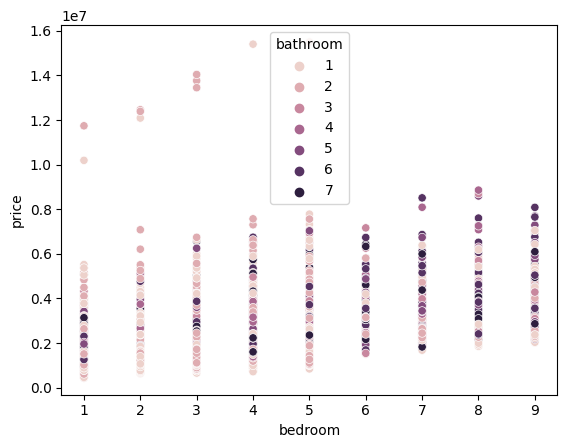

In [87]:
sns.scatterplot(data = train, y  = 'price',x='bedroom', hue = 'bathroom')

# 4. DATA PREPROCESSING




In [88]:
imputer = SimpleImputer(strategy = 'most_frequent')
train[train.columns] = imputer.fit_transform(train)

In [89]:

# label encoding

for i in ['loc', 'title']:
  train[i] = train[i].astype('category')
  test[i] = test[i].astype('category')
  train[i] = train[i].cat.codes
  test[i] = test[i].cat.codes



Type casting the columns to int

In [90]:
train["bedroom"] = train["bedroom"].astype(int)
train["bathroom"] = train["bathroom"].astype(int)
train["parking_space"] = train["parking_space"].astype(int)

In [91]:
test["bedroom"] = test["bedroom"].astype(int)
test["bathroom"] = test["bathroom"].astype(int)
test["parking_space"] = test["parking_space"].astype(int)

In [92]:
X,y = train.drop(['ID','price'],axis = 1), train['price']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42, test_size = .2)

# 5. TRAINING A MODEL


In [93]:

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
mean_squared_error(y_test, preds, squared = False) #rmse

693213.0129412585

In [94]:
sub_file = pd.DataFrame({
    'ID': test.ID,
    'price': rf.predict(test[X.columns])
})

sub_file.to_csv('submission.csv', index = False)

THINGS TO IMPROVE MODEL PERFORMANCE
* Try out other algorithms
* Cross validation
* Hyperparameter Tuning
* More EDA
* Feature Engineering / Feature Selection
